# Plot generation

This notebook reads the result files and generates plots. 

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('results/results.csv', delimiter  = ',', index_col = 'Methods')

In [5]:
df

,hydrofluoric acid,water,ammonia,O2
Methods,,,,
qdrift,1.260000e+24,1.570000e+24,2.720000e+24,5.640000e+24
rand_ham,3.120000e+24,1.340000e+25,8.600000e+25,1.440000e+25
taylor_naive,1.170000e+17,1.250000e+17,1.700000e+17,4.350000e+18
taylor_on_the_fly,4.450000e+19,5.740000e+19,8.020000e+19,2.210000e+20
configuration_interaction,1.070000e+25,2.350000e+25,4.300000e+25,NaN
low_depth_trotter,2.020000e+26,1.730000e+26,7.800000e+25,6.720000e+26
low_depth_taylor,1.320000e+13,1.010000e+13,5.280000e+12,1.170000e+13
low_depth_taylor_on_the_fly,2.230000e+26,3.770000e+26,2.980000e+26,9.030000e+26
linear_t,4.680000e+15,5.180000e+15,2.990000e+15,7.400000e+15


In [6]:
df = df.T
df

Methods,qdrift,rand_ham,taylor_naive,taylor_on_the_fly,configuration_interaction,low_depth_trotter,low_depth_taylor,low_depth_taylor_on_the_fly,linear_t,sparsity_low_rank,interaction_picture
hydrofluoric acid,1.260000e+24,3.120000e+24,1.170000e+17,4.450000e+19,1.070000e+25,2.020000e+26,1.320000e+13,2.230000e+26,4.680000e+15,2.110000e+12,1.060000e+20
water,1.570000e+24,1.340000e+25,1.250000e+17,5.740000e+19,2.350000e+25,1.730000e+26,1.010000e+13,3.770000e+26,5.180000e+15,3.350000e+12,9.330000e+19
ammonia,2.720000e+24,8.600000e+25,1.700000e+17,8.020000e+19,4.300000e+25,7.800000e+25,5.280000e+12,2.980000e+26,2.990000e+15,5.880000e+12,4.620000e+19
O2,5.640000e+24,1.440000e+25,4.350000e+18,2.210000e+20,NaN,6.720000e+26,1.170000e+13,9.030000e+26,7.400000e+15,1.060000e+13,1.280000e+20


In [7]:
df.reset_index()
#df.plot.bar(logy = True)

Methods,index,qdrift,rand_ham,taylor_naive,taylor_on_the_fly,configuration_interaction,low_depth_trotter,low_depth_taylor,low_depth_taylor_on_the_fly,linear_t,sparsity_low_rank,interaction_picture
0,hydrofluoric acid,1.260000e+24,3.120000e+24,1.170000e+17,4.450000e+19,1.070000e+25,2.020000e+26,1.320000e+13,2.230000e+26,4.680000e+15,2.110000e+12,1.060000e+20
1,water,1.570000e+24,1.340000e+25,1.250000e+17,5.740000e+19,2.350000e+25,1.730000e+26,1.010000e+13,3.770000e+26,5.180000e+15,3.350000e+12,9.330000e+19
2,ammonia,2.720000e+24,8.600000e+25,1.700000e+17,8.020000e+19,4.300000e+25,7.800000e+25,5.280000e+12,2.980000e+26,2.990000e+15,5.880000e+12,4.620000e+19
3,O2,5.640000e+24,1.440000e+25,4.350000e+18,2.210000e+20,NaN,6.720000e+26,1.170000e+13,9.030000e+26,7.400000e+15,1.060000e+13,1.280000e+20


In [32]:
df

Methods,qDRIFT,Random Hamiltonian,Taylor naive,Taylor on-the-fly,Configuration Interaction,Low-depth Trotter,Low-depth Taylor naive,Low-depth Taylor on-the-fly,Linear T,Sparsity low-rank,Interaction picture
HF,2.180000e+24,3.420000e+24,9.740000e+16,4.840000e+19,9.950000e+24,1.110000e+26,3.180000e+39,2.310000e+26,4.990000e+15,3.000000e+12,1.470000e+20
ammonia,4.730000e+24,1.830000e+26,2.340000e+17,6.010000e+19,3.510000e+25,3.310000e+25,9.290000e+39,2.800000e+26,2.660000e+15,8.930000e+12,6.750000e+19


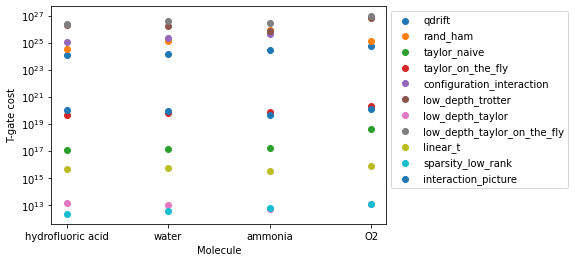

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

plt.xlabel("Molecule")
plt.ylabel("T-gate cost")
plt.yscale('log')
#plt.legend(loc='upper left')

# Function add a legend  
#plt.legend(list(df.columns), loc='upper left')

for col in df.columns:
    ax.scatter(df.index, df[col], label = col)

ax.legend(bbox_to_anchor=(1, 1))


plt.show()

In [ ]:
list(df.columns)

['qDRIFT',
 'Random Hamiltonian',
 'Taylor naive',
 'Taylor on-the-fly',
 'Configuration Interaction',
 'Low-depth Trotter',
 'Low-depth Taylor naive',
 'Low-depth Taylor on-the-fly',
 'Linear T',
 'Sparsity low-rank',
 'Interaction picture']